# Prophet Seasonality Components
Examine seasonality components within prophet

# Required Packages
    Highly recommending on being on python >= 3.7
    1) prophet
        
        Documentation: https://facebook.github.io/prophet/docs/installation.html
        
        Git
        ---
        git clone https://github.com/facebook/prophet.git
        
        Anaconda
        --------
        conda install gcc
        conda install -c conda-forge fbprophet
        
        pip
        ---
        (somewhat problematic with python 3.6 and lower)
        pip install pystan --user
        pip install fbprophet --user
        
        If you are having install issues, try installing pystan separately:
        conda install libpython m2w64-toolchain -c msys2
        pip install pystan
        conda install pystan -c conda-forge
    2) pystan
    3) pandas
    4) matplotlib
    5) numpy
    6) copy
    7) plotly
    8) statsmodels
    9) datetime

# TODO
    Step 1: Make DS and Y columns
    Step 2: Fit a prophet model; examine seasonality
    Step 3: Add other seasonality
    Step 4: Adjust trend flexibility
    Step 5: Examine uncertainty bands
    Step 6: Plot results
    Step 7: Evaluate with sMAPE


In [1]:
import pandas as pd
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
from util_prophet import *

This data set is monthly sales contract backlog data. Each month represents the remaining backlog for the given quarter.<br>
For instance on 1/1/2019, we see a value of 3.65765, which is how much backlog is expected to be sold during the remainder of Q1.<br> On 2/1/2019, we have progressed through activity of the first month of January, we now have two months to go, thus a smaller backlog on that date. <br>Similarly on 3/1/2019, we have progressed through two months of the quarter and only have one month left of backlog for the quarter.

# Step 1: Make DS and Y columns

In [2]:
df = pd.read_csv('./data/backlog.csv')

In [3]:
df.head()

ds  Backlog
0  1/1/2019  3.65765
1  2/1/2019  2.93164
2  3/1/2019  1.65984
3  4/1/2019  2.95656
4  5/1/2019  1.45475

In [4]:
df.columns = ['ds','y']

In [5]:
train = df.iloc[:int(len(df)*0.8)]
test = df.iloc[int(len(df)*0.8):]

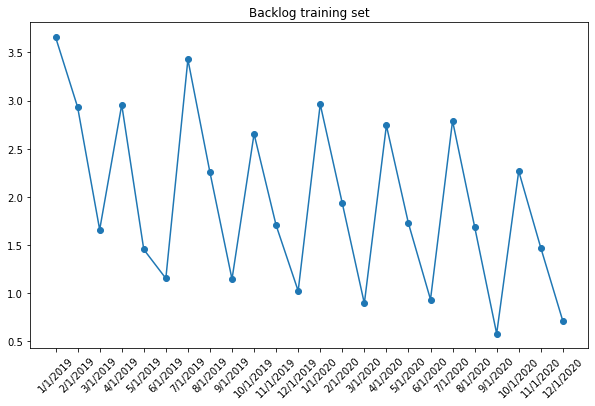

In [6]:
figure(figsize=(10,6))
plt.plot(train.ds,train.y, marker='o')
plt.title('Backlog training set')
plt.xticks(rotation=45)
plt.show()

# Step 2: Fit a prophet model; examine seasonality

Examine the model fit on monthly data

In [7]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [8]:
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)

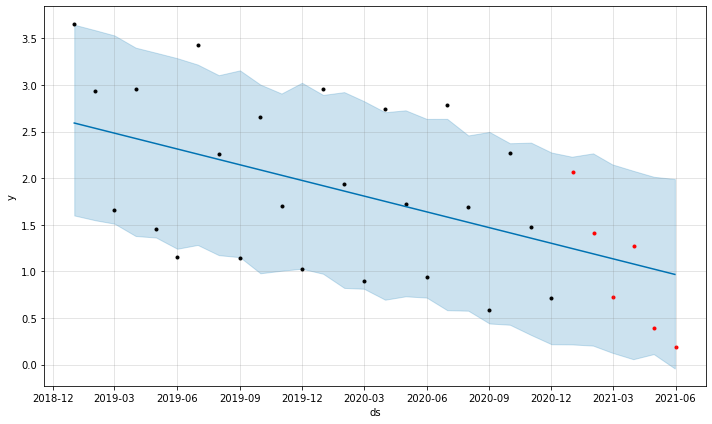

In [9]:
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

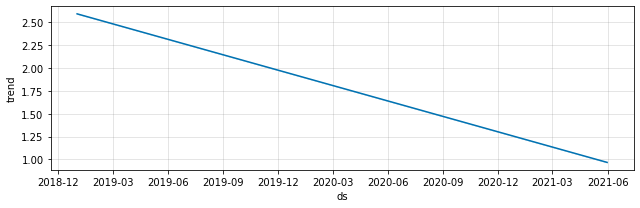

In [10]:
p = model.plot_components(forecast_data)

## Adjust the seasonality prior to see if it picks up any seasonality component

In [11]:
model = Prophet(seasonality_prior_scale=5)
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [12]:
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)

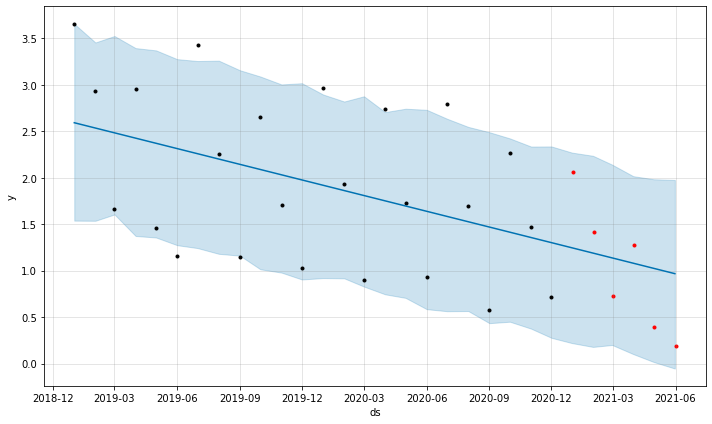

In [13]:
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

#### Why is prophet not picking up any seasonality?

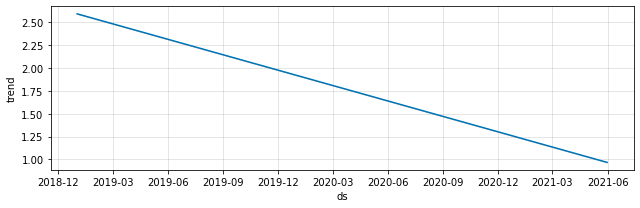

In [14]:
p = model.plot_components(forecast_data)

# Step 3: Add other seasonality

By default, prophet fits weekly and yearly seasonality. It can also fit daily seasonality for a sub-daily time series<br>
Now, we can add other seasonalities with the *.add_seasonality()* method.<br>
Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly, so we'll try something in between

In [15]:
model = Prophet()
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.5)
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


In [16]:
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)

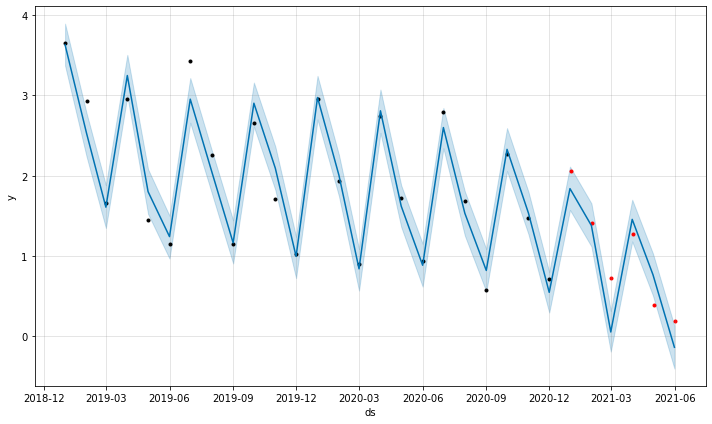

In [17]:
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

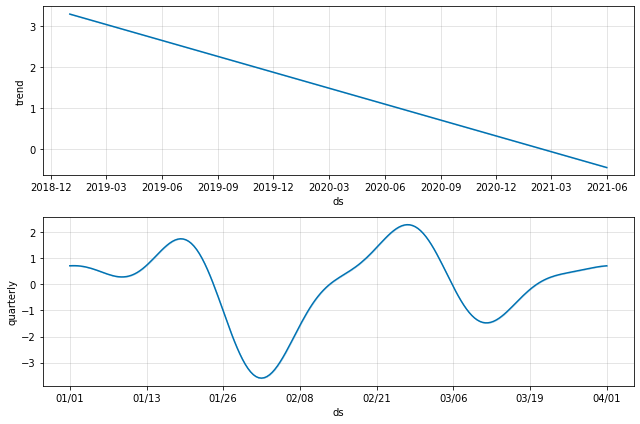

In [18]:
p = model.plot_components(forecast_data)

### Alter the prior scale so it is not fit as tight to the data

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


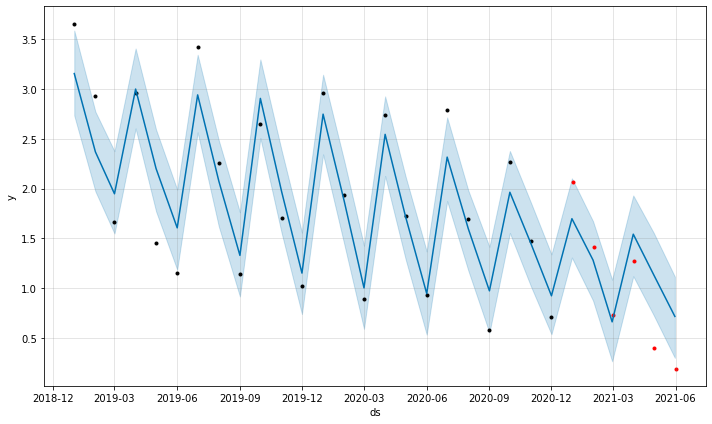

In [19]:
model = Prophet()
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.03)
model.fit(train)
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

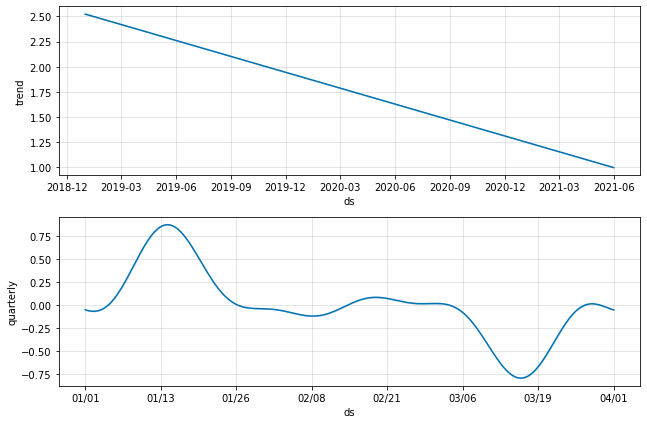

In [20]:
p = model.plot_components(forecast_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


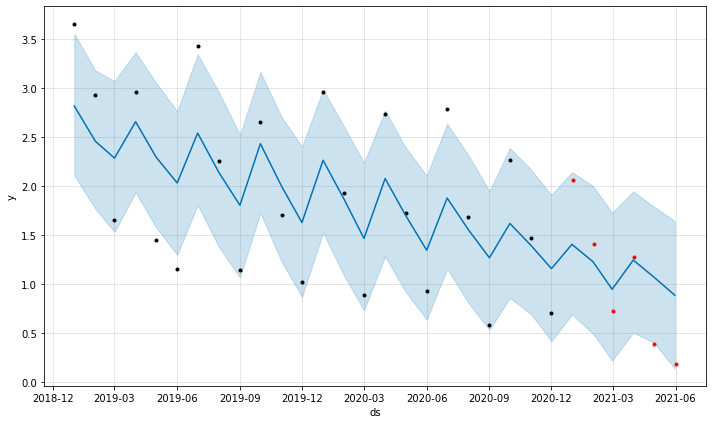

In [21]:
model = Prophet()
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.02)
model.fit(train)
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

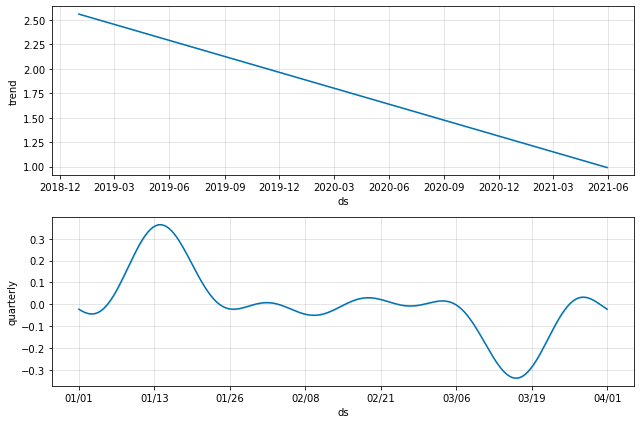

In [22]:
p = model.plot_components(forecast_data)

# Step 4: Adjust trend flexibility
Default is 0.05
#### Increasing the prior scale takes longer to calculate, why?

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


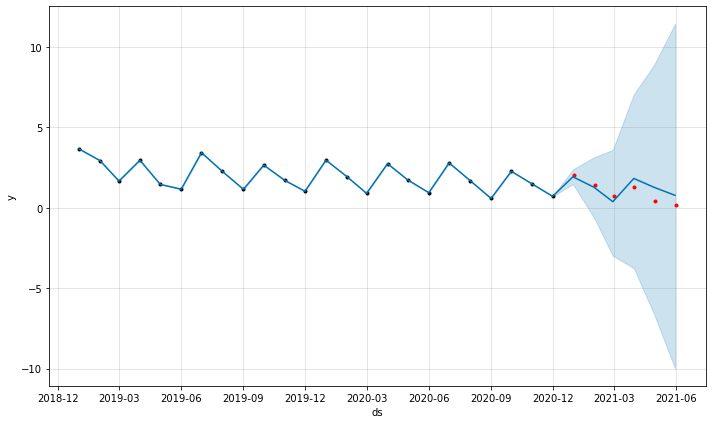

In [23]:

model = Prophet(changepoint_prior_scale=5)
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.02)
model.fit(train)
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

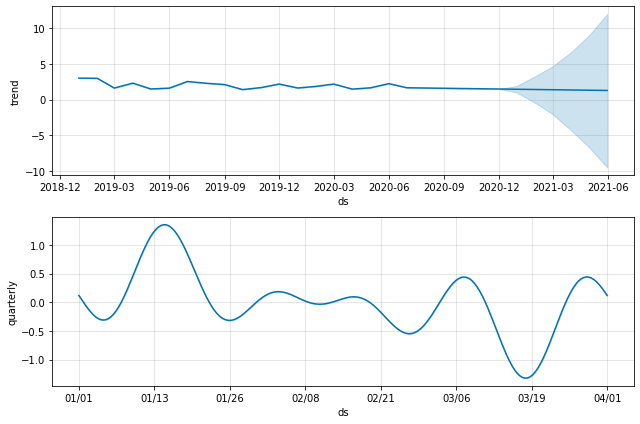

In [24]:
p = model.plot_components(forecast_data)

#### What do we think is going on with our forecasts and uncertainty bands?

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


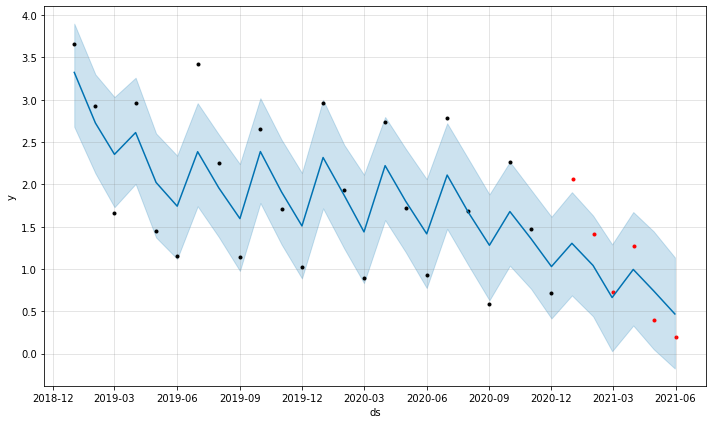

In [25]:
model = Prophet(changepoint_prior_scale=2)
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.02)
model.fit(train)
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

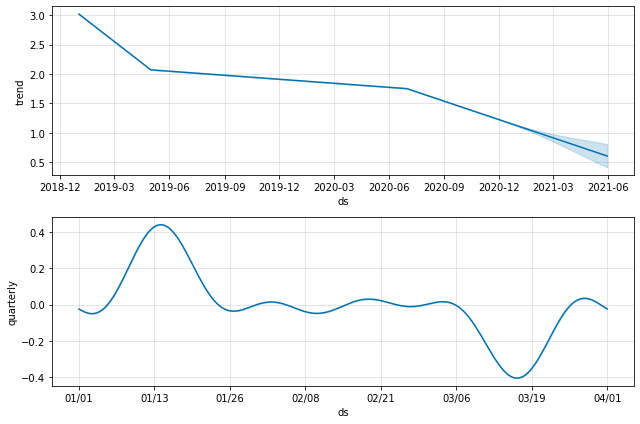

In [26]:
p = model.plot_components(forecast_data)

# Step 5: Examine uncertainty bands

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


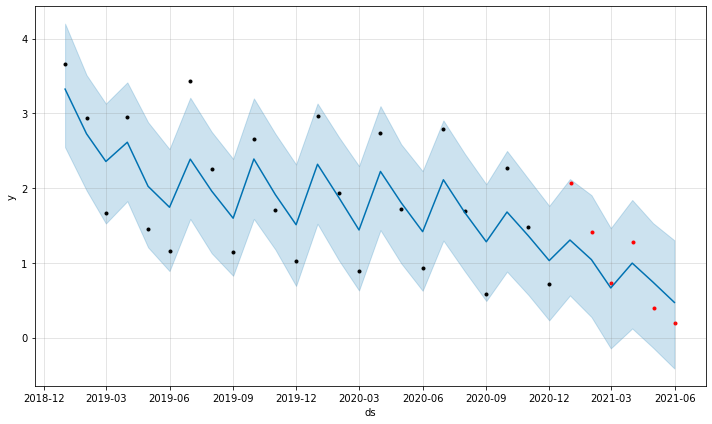

In [27]:
model = Prophet(changepoint_prior_scale=2, interval_width=0.90)
model.add_seasonality(
        name='quarterly', period =90, fourier_order=5, prior_scale=0.02)
model.fit(train)
future_data = model.make_future_dataframe(periods=len(test), freq='m')
forecast_data = model.predict(future_data)
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(test['ds']),pd.to_numeric(test['y']), color='r', marker='.')
plt.show()

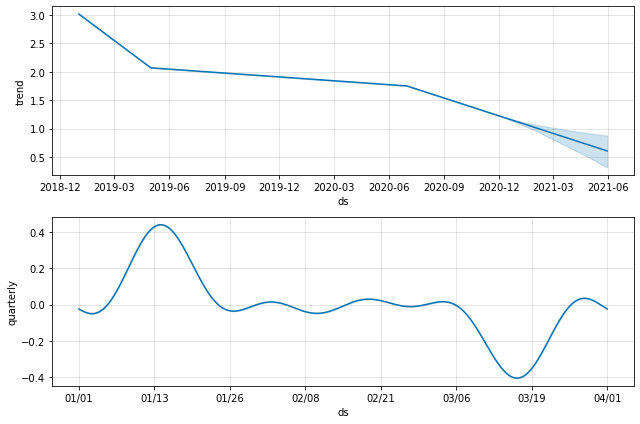

In [28]:
p = model.plot_components(forecast_data)

# Step 6: Plot Results

In [29]:
plot_plotly_modified(model, forecast_data, test['ds'], test['y'], changepoints=True, ylabel='Backlog')


# Step 7: Evaluate with sMAPE

### Training sMAPE

In [30]:
smape(train['y'], forecast_data.iloc[:-len(test)]['yhat'])

24.942772431558545

### Test sMAPE

In [31]:
smape(test['y'], forecast_data.iloc[-len(test):]['yhat'])

42.29286700771862

#### Does this test sMAPE value make sense to us? What do we think about this model?